In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/SuperMarket Analysis.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating',
       'Year', 'Month', 'Day', 'Weekday', 'Is_Weekend', 'Quarter'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

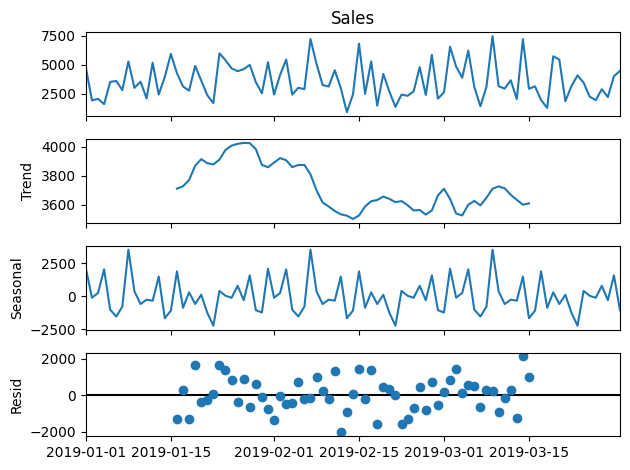

ADF Statistic: -7.6548957268033435
p-value: 1.7495640309589474e-11
 Data is stationary (no trend).


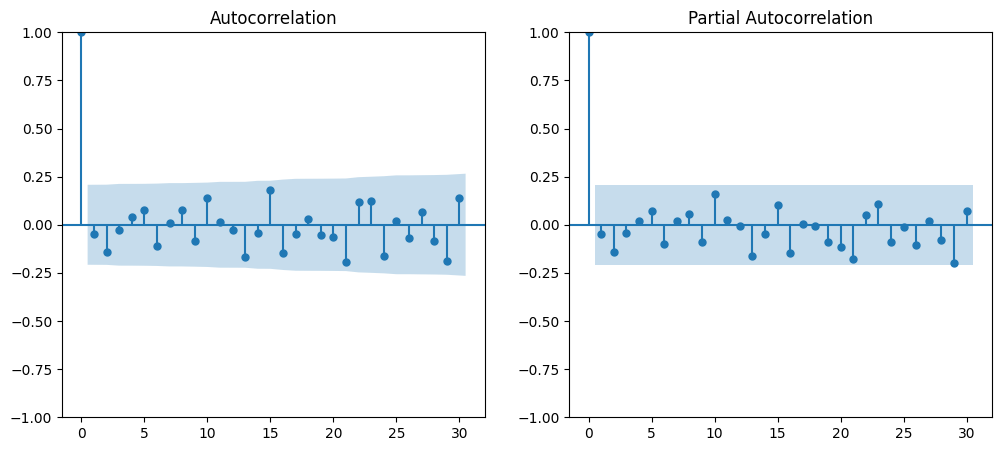

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


# Load dataset
df = pd.read_csv("/content/SuperMarket Analysis.csv")

# Check if 'Date' column exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
elif {'Year', 'Month', 'Day'}.issubset(df.columns):
    # If 'Date' does not exist, create from 'Year', 'Month', 'Day' columns
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
else:
    # Raise an error if no valid date information is found
    raise KeyError("No valid 'Date' column found, and 'Year', 'Month', 'Day' columns are missing.")

# Set Date as index
df.set_index('Date', inplace=True)
df = df.sort_index()

# Aggregate sales at a daily level
df_daily = df.resample('D').sum()


# 2. FEATURE ENGINEERING FROM DATE-TIME

df_daily['Year'] = df_daily.index.year
df_daily['Month'] = df_daily.index.month
df_daily['Day'] = df_daily.index.day
df_daily['Weekday'] = df_daily.index.weekday
df_daily['Is_Weekend'] = (df_daily['Weekday'] >= 5).astype(int)  # 1 for Sat/Sun
df_daily['Quarter'] = df_daily.index.quarter



#  3. HANDLING SEASONALITY & TREND


# Seasonal Decomposition
decomposition = seasonal_decompose(df_daily['Sales'], model='additive', period=30)

# Plot components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# ADF Test to Check Stationarity
result = adfuller(df_daily['Sales'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print(" Data is stationary (no trend).")
else:
    print(" Data is non-stationary (has trend). Differencing needed.")

# Apply Differencing If Needed
df_daily['Sales_diff'] = df_daily['Sales'].diff().dropna()  # First-order differencing

# Check for Seasonal Patterns using ACF/PACF
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sm.graphics.tsa.plot_acf(df_daily['Sales'].dropna(), ax=ax[0], lags=30)
sm.graphics.tsa.plot_pacf(df_daily['Sales'].dropna(), ax=ax[1], lags=30)
plt.show()

# Apply Seasonal Differencing If Seasonality Exists
df_daily['Sales_seasonal_diff'] = df_daily['Sales'].diff(periods=7).dropna()  # Weekly differencing





/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   89
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -768.488
Date:                Wed, 05 Mar 2025   AIC                           1558.975
Time:                        05:06:32   BIC                           1586.226
Sample:                    01-01-2019   HQIC                          1569.954
                         - 03-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5007      0.304     -1.645      0.100      -1.097       0.096
ar.L2         -0.2255      0.211     -1.070      0.285      -0.639       0.188
ar.L3         -0.3819      0.244     -1.563      0.1

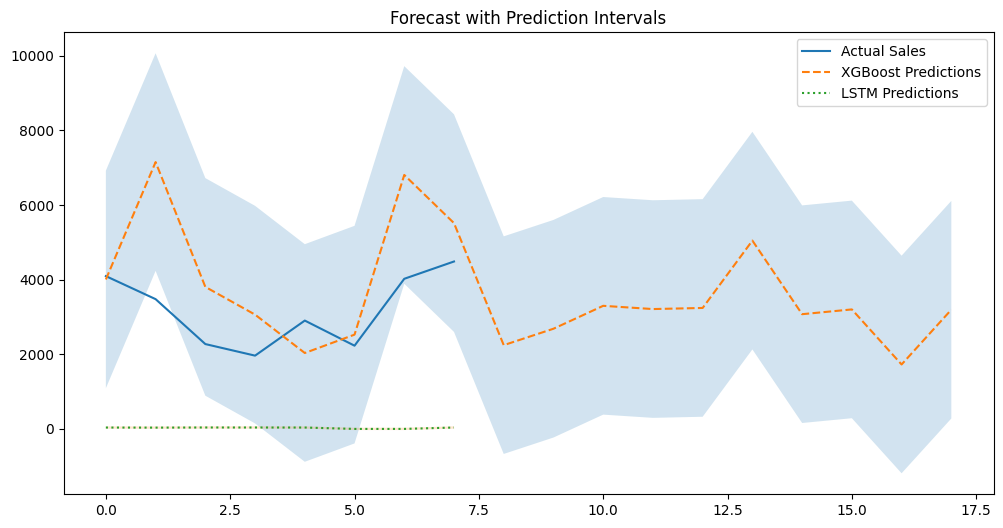

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset
df = pd.read_csv("/content/SuperMarket Analysis.csv", parse_dates=['Date'], index_col='Date')

# Feature Engineering: Extract Date Components
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Weekday'] = df.index.weekday
df['Is_Weekend'] = (df['Weekday'] >= 5).astype(int)
df['Quarter'] = df.index.quarter

# Resample daily sales
df = df.resample('D').sum()

# Integrating External Factors (Example: holidays & Promotions)
df['holidays'] = np.random.randint(15, 35, size=len(df))  # Simulated data
df['Promotions'] = np.random.choice([0,1], size=len(df))  # Simulated data

# Prepare data for ML Models
features = ['Year', 'Month', 'Day', 'Weekday', 'Is_Weekend', 'Quarter', 'holidays', 'Promotions']
X = df[features]
y = df['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline Model: ARIMA
arima_model = ARIMA(df['Sales'], order=(5,1,5))
arima_result = arima_model.fit()
print(arima_result.summary())

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)

# Prepare Data for LSTM
sequence_length = 10
X_lstm, y_lstm = [], []
for i in range(len(X_train_scaled) - sequence_length):
    X_lstm.append(X_train_scaled[i:i+sequence_length])
    y_lstm.append(y_train.iloc[i+sequence_length])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Define LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, X_train_scaled.shape[1])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile and Train Model
model.compile(optimizer='adam', loss='mse')
model.fit(X_lstm, y_lstm, epochs=20, batch_size=16, validation_split=0.2)

# Forecast using LSTM
X_test_lstm = []
y_test_lstm = y_test.iloc[sequence_length:].values
for i in range(len(X_test_scaled) - sequence_length):
    X_test_lstm.append(X_test_scaled[i:i+sequence_length])
X_test_lstm = np.array(X_test_lstm)
lstm_preds = model.predict(X_test_lstm)

# Evaluation Metrics
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%\n")
    return mae, rmse, mape

evaluate(y_test.values, xgb_preds, "XGBoost")
evaluate(y_test_lstm, lstm_preds.flatten(), "LSTM")

# Performance across different horizons
horizons = [7, 14, 30]
for h in horizons:
    print(f"\nEvaluating forecast performance for {h}-day horizon:")
    evaluate(y_test.values[:h], xgb_preds[:h], "XGBoost")
    evaluate(y_test_lstm[:h], lstm_preds[:h].flatten(), "LSTM")

# Plot Results with Prediction Intervals
plt.figure(figsize=(12,6))
plt.plot(y_test.values[sequence_length:], label='Actual Sales')
plt.plot(xgb_preds, label='XGBoost Predictions', linestyle='dashed')
plt.fill_between(range(len(xgb_preds)), xgb_preds - 1.96*np.std(xgb_preds), xgb_preds + 1.96*np.std(xgb_preds), alpha=0.2)
plt.plot(lstm_preds, label='LSTM Predictions', linestyle='dotted')
plt.fill_between(range(len(lstm_preds)), lstm_preds.flatten() - 1.96*np.std(lstm_preds), lstm_preds.flatten() + 1.96*np.std(lstm_preds), alpha=0.2)
plt.legend()
plt.title("Forecast with Prediction Intervals")
plt.show()
